# 5. Simple Linear Regression dengan Scikit-Learn

Simple Linear Regression memodulkan hubungan antara sebuah response variable dengan sebuah explanatory variable sebagai suatu garis lurus(linear)

Refrensi: https://en.wikipedia.org/wiki/Linear_regression

## Sample Dataset

In [2]:
import pandas as pd

pizza={'diameter': [6,8,10,12,14],
      'harga': [7,9,13,15.5,18]}

pizza_df=pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,12,15.5
4,14,18.0


## Visualisasi Data

untuk visualisasi data yang menggunakan sample dataset diatas menggunakan scatter plot

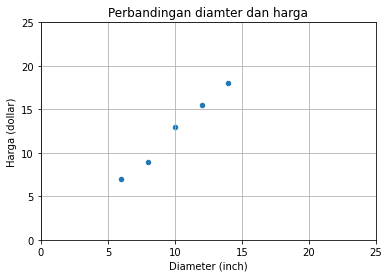

In [3]:
import matplotlib.pyplot as plt

pizza_df.plot (kind='scatter', x='diameter', y='harga')
plt.title('Perbandingan diamter dan harga')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True) #(garis bantu)
plt.show()

## Simple Linear Regression Model

### Penyesuasian Dataset

In [4]:
import numpy as np

x=np.array(pizza_df['diameter'])#mengubah pandas dataframe (varriable pizza_df) menjadi numpy array dan menampungnya di variable x
y=np.array(pizza_df['harga'])#mengubah pandas dataframe (varriable pizza_df) menjadi numpy array dan menampungnya di variable y

print(f'x:{x}')
print(f'y:{y}')

x:[ 6  8 10 12 14]
y:[ 7.   9.  13.  15.5 18. ]


In [5]:
x=x.reshape(-1,1) #mengubah sebuah bentuk data yang tadinya satu dimensi menjadi 2 dimensi
x.shape

(5, 1)

In [6]:
x

array([[ 6],
       [ 8],
       [10],
       [12],
       [14]], dtype=int64)

note: dataset yang baru dirubah dari pandas Dataframe masih berbentuk 1 dimensi untuk dapat digunakan scikit learn harus dirubah menjadi 2 dimensi

## Training Simple Linear Regression Model

In [7]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()#membuat object Simple Linear Regression Model
model.fit(x, y) 
    #parameter 1 diisi nilai features
    #parameter 2 diisi nilai targets

LinearRegression()

### Visualisasi Simple Linear Regression Model

In [8]:
x_vis=np.array([0, 25]).reshape(-1,1)#reshape ada disitu untuk menjadi dua dimensi
y_vis=model.predict(x_vis)#menampung nilai target berdasarkan nilai features

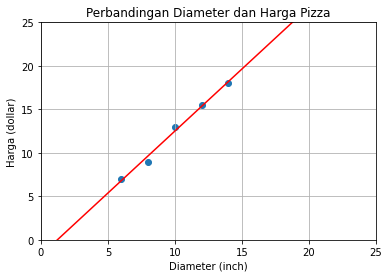

In [9]:
plt.scatter(x, y)
plt.plot(x_vis, y_vis,'-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

Formula Linear Regression: $y$ = $\alpha$ + $\beta$$x$

- $y$ : Response Variable
- $\alpha$ : intercept
- $\beta$ : slope

- $x$ : explanatory variable


In [10]:
print(f'intercept:{model.intercept_}')# menampilkan nilai intercept
print(f'slope: {model.coef_}')#menampilkan nilai slope

intercept:-1.7500000000000036
slope: [1.425]


## Menghitung nilai Slope

Nilai slope pada Linear Regression bisa diperoleh dengan memanfaatkan formula berikut:

$\beta$ = $\frac{cov(x,y)}{var(x)}$

In [11]:
print(f'x:\n{x}\n')
print(f'x flatten: {x.flatten()}\n')#flatten digunakan untuk menkonversi array dua dimensi
print(f'x: {y}')

x:
[[ 6]
 [ 8]
 [10]
 [12]
 [14]]

x flatten: [ 6  8 10 12 14]

x: [ 7.   9.  13.  15.5 18. ]


### covarience

- untuk menghitung nilai covariance kita cukup menggunakan method np.cov()
- parameter pertama dimethod np.cov() adalah nilai dari variable yang sudah di flatten-kan
- paramter kedua adalah y

In [12]:
np.cov(x.flatten(), y)

array([[10.  , 14.25],
       [14.25, 20.5 ]])

- pemanggilan method diatas akan menghasilkan covarience matrix yang terdiri dari dua kolom 
- nilai covariance yang akan digunakan adalah yang kanan atas dan berikut adalah cara mengambil nilai itu saja:

In [13]:
covariance_xy= np.cov(x.flatten(), y)[0][1]#artinya dimensi satunya (baris) index ke 0 dan dimensi keduanya (kolom) index ke 1
print(f'covariance: {covariance_xy}')

covariance: 14.25


### Variance

- untuk menghitung nilai variance kita cukup menggunakan method np.var()
- parameter pertama dimethod np.var() adalah nilai dari variable yang sudah di flatten-kan
- parameter kedua adalah ddof (degree of freedom)

In [14]:
variance_x= np.var(x.flatten(),ddof=1)
print(f'variance: {variance_x}')

variance: 10.0


### Slope

In [15]:
slope= covariance_xy / variance_x
print(f'slope:{slope}')

slope:1.425


## Mencari nilai intercept

Nilai intercept pada Linear Regression bisa diperoleh dengan memanfaatkan formula berikut:


$\alpha = \bar{y} - \beta$ $\bar{x}$

In [16]:
intercept = np.mean(y)- slope * np.mean(x)
print(f'intercept: {intercept}')

intercept: -1.75


## Prediksi Harga Pizza

In [20]:
diameter_pizza=np.array([10,15,14]).reshape(-1, 1)#reshape ada disitu untuk menjadi dua dimensi
diameter_pizza

array([[10],
       [15],
       [14]])

In [26]:
prediksi_harga=model.predict(diameter_pizza)
prediksi_harga

array([12.5  , 19.625, 18.2  ])

In [27]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'Diameter:{dmtr}prediksi harga: {hrg}')

Diameter:[10]prediksi harga: 12.5
Diameter:[15]prediksi harga: 19.625
Diameter:[14]prediksi harga: 18.2


## Evaluasi Simple Linear Regression Model

### Training & Testing Dataset

In [33]:
x_train =np.array([6, 8, 10, 12, 14]).reshape(-1,1)
y_train =np.array([7, 9.5, 11.5, 13, 7])#parameter

x_test=np.array([8, 10 , 14, 11, 13]).reshape(-1,1)
y_test=np.array([5, 9 ,13, 11, 5])#parameter
#ingat scikit learn membutuhkan featrues yang berbentuk matrix atau array dua dimensi!

### Training Simple Linear Regression Model

In [34]:
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared ($R^2$)

Referensi: https://en.wikipedia.org/wiki/Coefficient_of_determination

In [37]:
from sklearn.metrics import r2_score

y_pred=model.predict(x_test)#prediksi nilai x_test yang ditampung di variable y_pred
r_squared=r2_score (y_test, y_pred)#membandingkan nilai target dan nilai prediksi
print(f'R-squared: {r_squared}')

R-squared: -0.04450683593749982


## Mencari nilai R-squard($R^2$)

### formula yang akan digunakan:

### $R^2 = 1- \frac {SS_{res}}{SS_{tot}}$

### $SS_{res} = \sum_{i=1}^{n} (y_i - f(x_i))^2$ 

### $SS_{tot} = \sum_{i=1}^{n} (y_i - \bar{y})^2$ 

### $SS_{res}$

In [44]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1,1))[0])**2
              for x_i, y_i in zip (x_test, y_test)])
print(f'ss_res: {ss_res}')

ss_res: 53.47875


### $SS_{tot}$ 

In [45]:
mean_y= np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: 51.2


### $R^2$

In [46]:
r_squared= 1- (ss_res / ss_tot)
print(f'R-squared: {r_squared}')

R-squared: -0.04450683593749982


source: https://www.youtube.com/watch?v=lcjq7-2zMSA Trs_m